# Decision Tree: Marketing Problem
# https://github.com/sjasthi/Python-DS-Data-Science/blob/main/datasets/marketing_data.xlsx

# Explanation of Data
# https://github.com/sjasthi/Python-DS-Data-Science/blob/main/datasets/marketing_data_explanations.txt



In [ ]:
#@title Do the required imports
import pandas as pd

# import LabelEncoder that encodes the string data into some unique numbers
# because Machine Learning algorithms do not recognize the strings
from sklearn.preprocessing import LabelEncoder

# import the Decision Tree Classifier from sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#@title Load the dataset
df = pd.read_excel('marketing_problem.xlsx')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
#@title Explore the data given

# getting the type
print("1. Data type of the data we read is: ")
print(type(df))

# getting the top 5 values
print("\n\n2. Here are your top 5 rows; You can also give an int to head()")
display(df.head())

# getting the bottom 5 values
print("\n\n3. Here are your bottom 5 rows; You can also give an int to tail() ")
display(df.tail())

# finding the length of the data frame (how many rows are there in the data frame)
print("\n\n4. Here is the length (number of rows) of the dataframe ")
print(len(df))

# finding the column list
print("\n\n5. Here are the column names of the dataframe; and the default datatype (Index) of the column list")
x = df.columns
print(type(x))
print(x)

# finding the row (index) list
print("\n\n6. Here are the row names of the dataframe; and the datatype (RangeIndex) of the row list.")
x = df.index
print(type(x))
print(x)



print("\n\n7. info summary about the data frame, this also lists the non-null count for each column")
print(df.info())

print("\n\n8. data types in the data frame")
print(df.dtypes)


print("\n\n9. Number of rows and columns in the dataframe")
#row_count, column_count = df.shape
row_count = df.shape[0]
column_count = df.shape[1]
print('Rows:', row_count, 'Columns:', column_count)


nan_in_df = df.isnull().values.any()
print("\n\n10. Are there any missing values in the dataframe", nan_in_df)

df_stats = df.describe()
print("\n\n11. Descriptive Statistics of the dataframe (only numerical columns)\n", df_stats)


# Select only the categorical columns
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_stats = categorical_df.describe()

print("\n\n11. Descriptive Statistics of the dataframe (only categorical columns)\n", categorical_stats)


1. Data type of the data we read is: 
<class 'pandas.core.frame.DataFrame'>


2. Here are your top 5 rows; You can also give an int to head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no




3. Here are your bottom 5 rows; You can also give an int to tail() 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no




4. Here is the length (number of rows) of the dataframe 
4521


5. Here are the column names of the dataframe; and the default datatype (Index) of the column list
<class 'pandas.core.indexes.base.Index'>
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


6. Here are the row names of the dataframe; and the datatype (RangeIndex) of the row list.
<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=4521, step=1)


7. info summary about the data frame, this also lists the non-null count for each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   educa

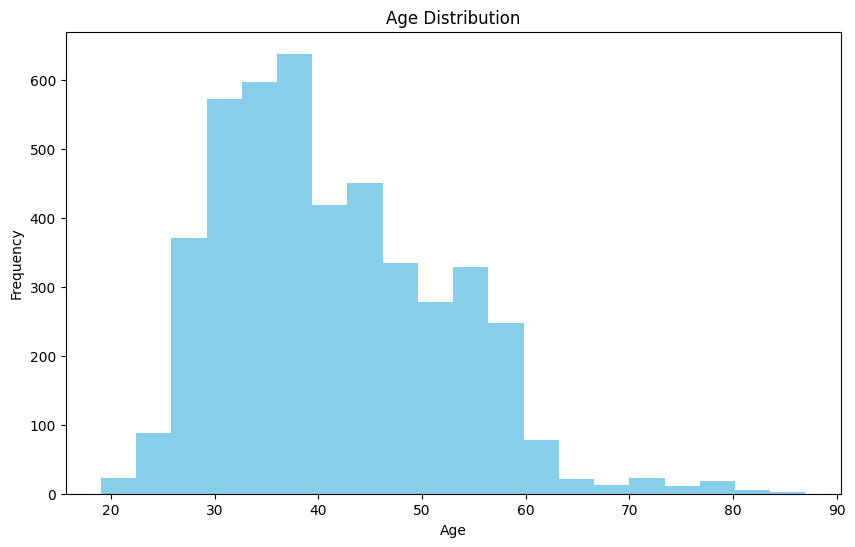

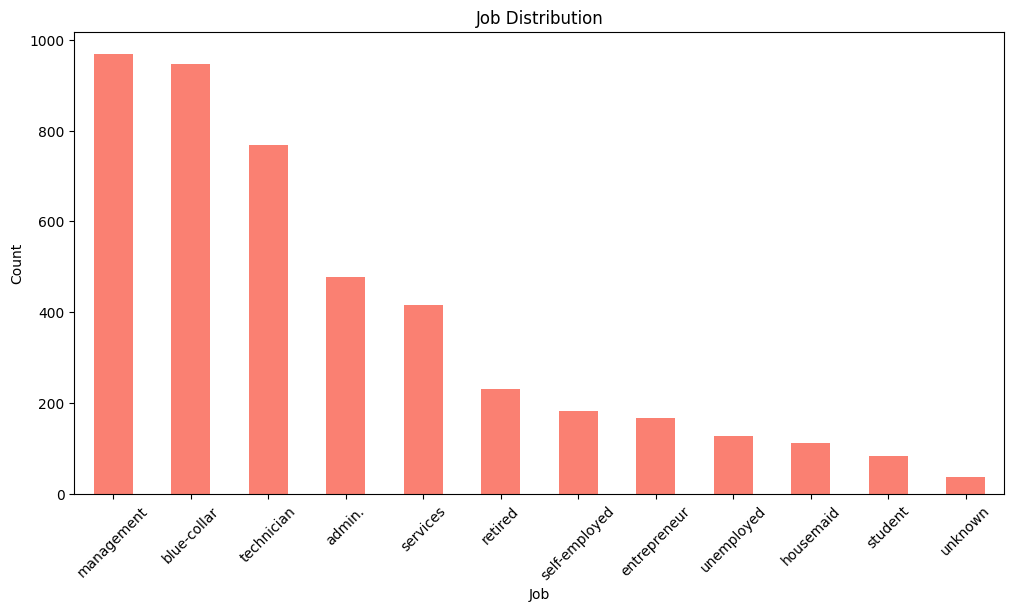

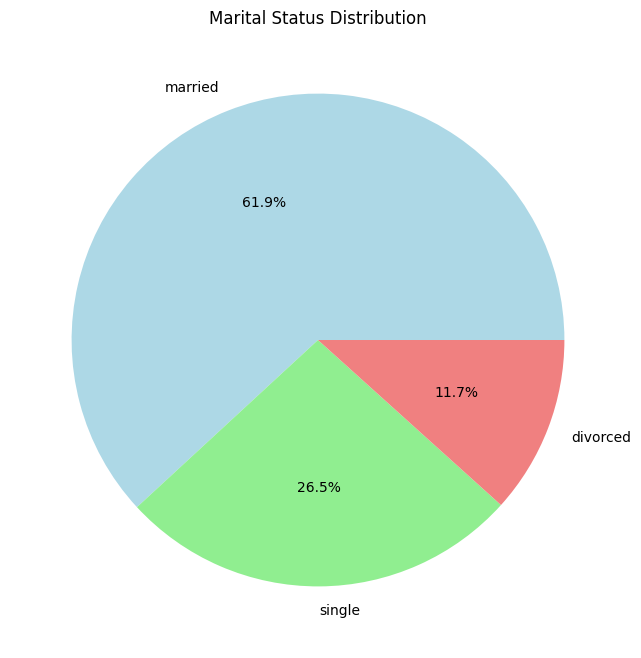

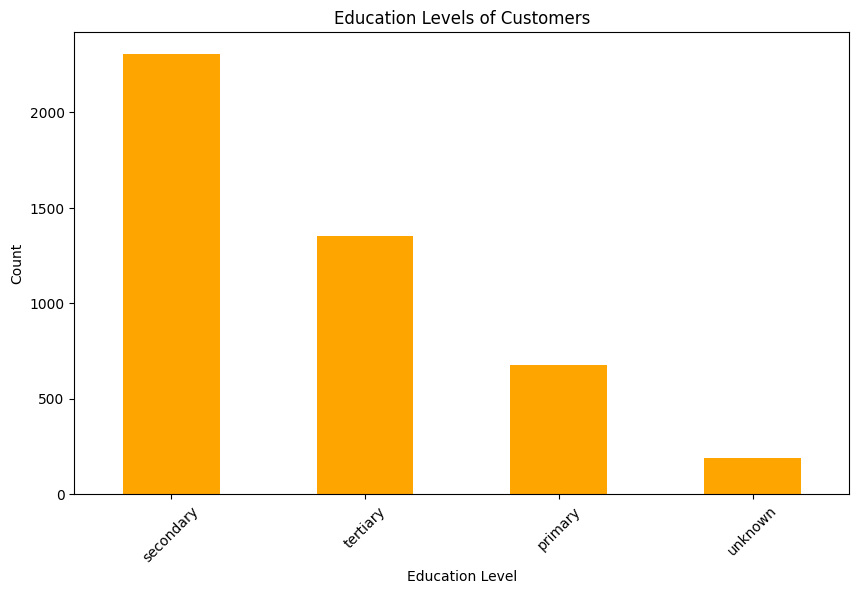

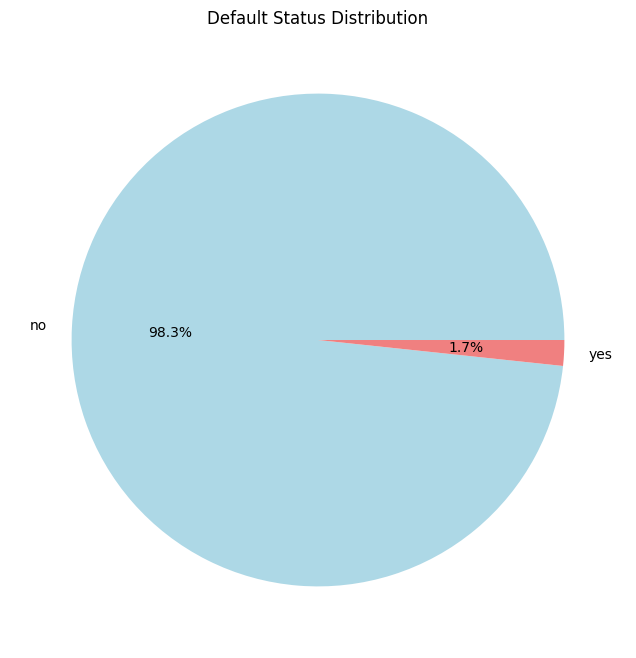

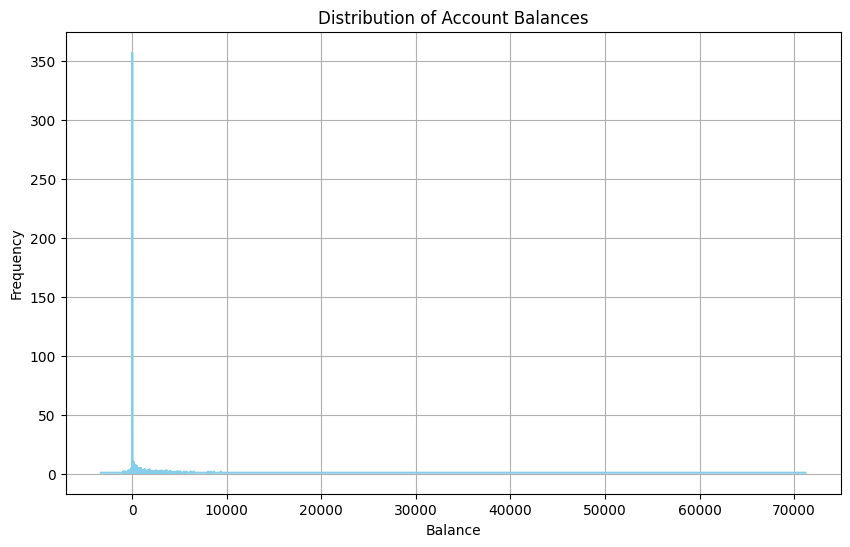

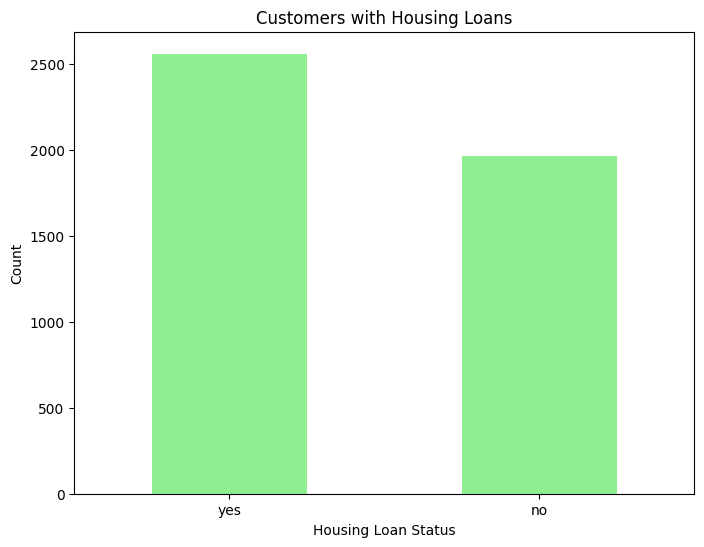

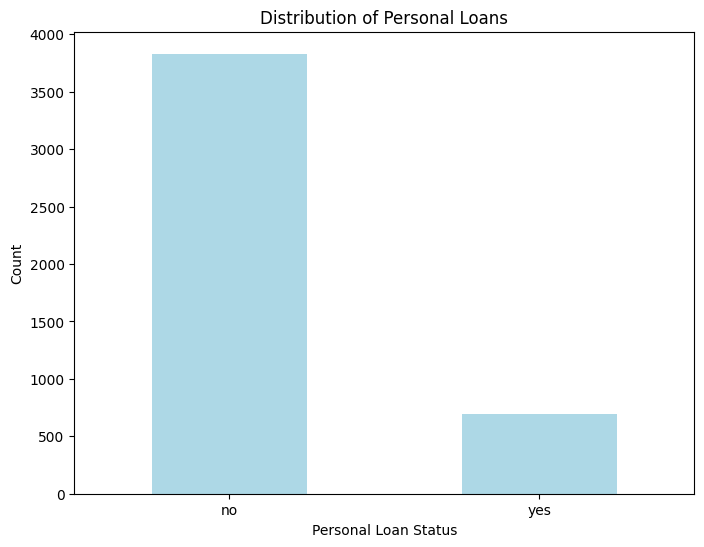

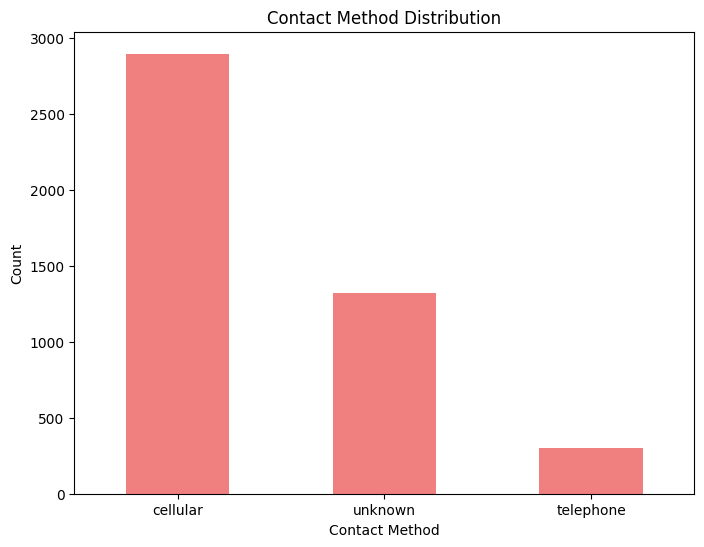

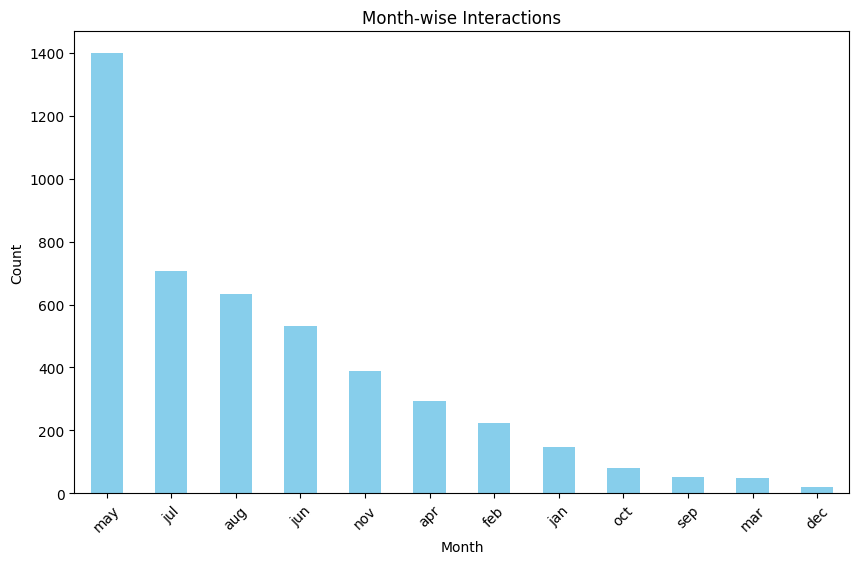

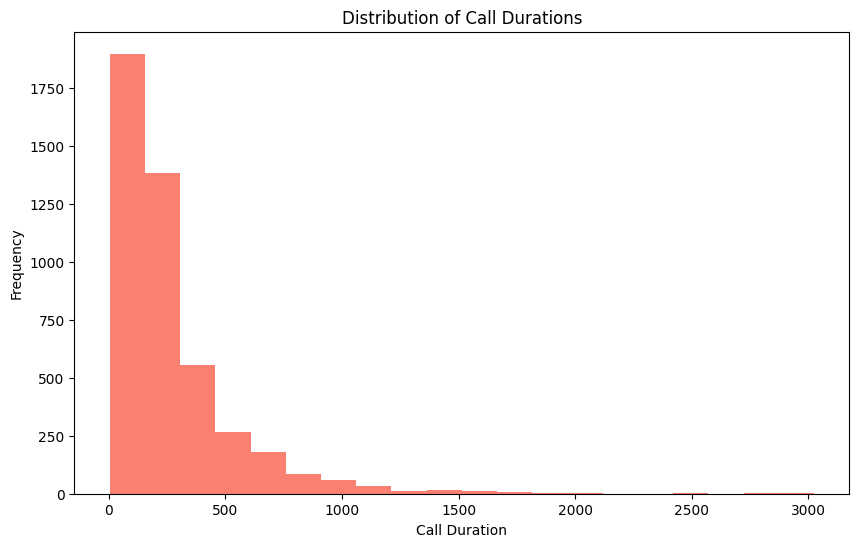

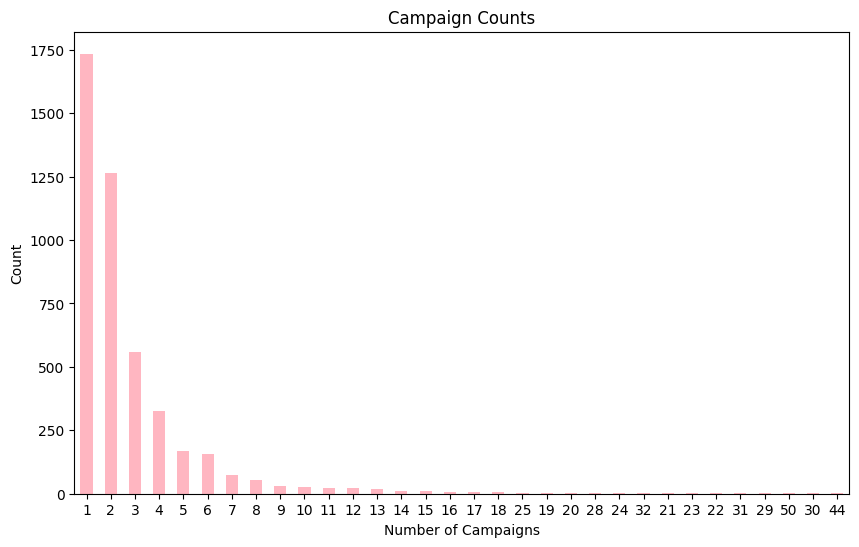

In [ ]:
#@title Visualizations of the data
#(bar charts, histograms, pie charts, etc.)

# 1. Histogram of Age Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# 2. Bar Chart of Job Distribution
plt.figure(figsize=(12, 6))
df['job'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()


# 3. Pie Chart of Marital Status Distribution
plt.figure(figsize=(8, 8))
df['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

# 4. Bar Chart of Education Levels
plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar', color='orange')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Levels of Customers')
plt.xticks(rotation=45)
plt.show()

# 5. Pie Chart of Default Status
plt.figure(figsize=(8, 8))
df['default'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Default Status Distribution')
plt.ylabel('')
plt.show()

# 6. Line Chart of Balance Distribution
plt.figure(figsize=(10, 6))
df['balance'].value_counts().sort_index().plot(kind='line', color='skyblue')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Account Balances')
plt.grid(True)
plt.show()

# 7. Bar Chart of Housing Loan Status
plt.figure(figsize=(8, 6))
df['housing'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.title('Customers with Housing Loans')
plt.xticks(rotation=0)
plt.show()

# 8. Bar Chart of Loan Status
plt.figure(figsize=(8, 6))
df['loan'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Personal Loans')
plt.xticks(rotation=0)
plt.show()

# 9. Bar Chart of Contact Types
plt.figure(figsize=(8, 6))
df['contact'].value_counts().plot(kind='bar', color='lightcoral')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Contact Method Distribution')
plt.xticks(rotation=0)
plt.show()

# 10. Bar Chart of Month-wise Interaction
plt.figure(figsize=(10, 6))
df['month'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month-wise Interactions')
plt.xticks(rotation=45)
plt.show()

# 11. Histogram of Call Duration
plt.figure(figsize=(10, 6))
plt.hist(df['duration'], bins=20, color='salmon')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Call Durations')
plt.show()

# 12. Bar Chart of Campaign Counts
plt.figure(figsize=(10, 6))
df['campaign'].value_counts().plot(kind='bar', color='lightpink')
plt.xlabel('Number of Campaigns')
plt.ylabel('Count')
plt.title('Campaign Counts')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#@title Feature Engineering - Label Encoding
# which columns should be kept in the model?
# which columns should be dropped from the model?

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column and encode labels if it's a string column
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains string values
        df[column] = label_encoder.fit_transform(df[column])

display(df.head())
display(df.info())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


None

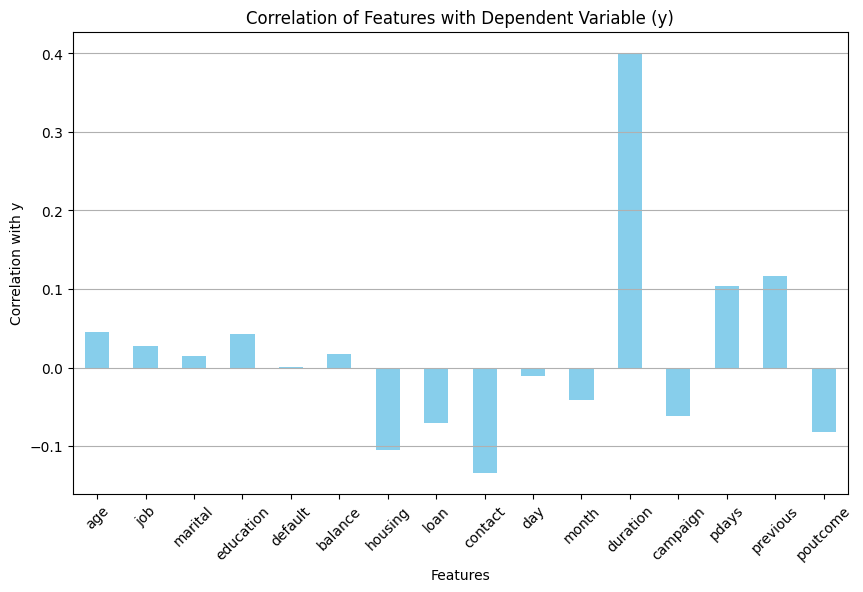

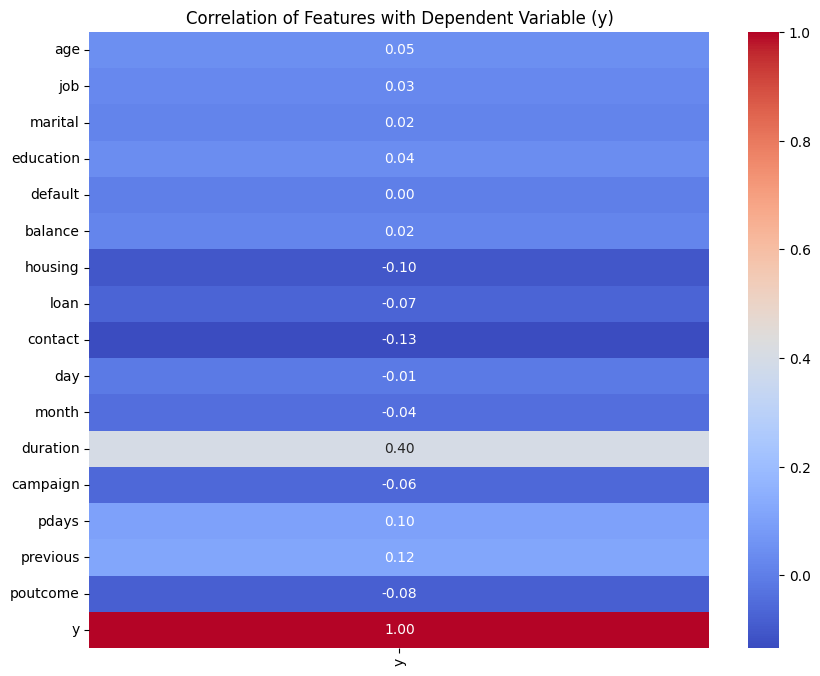

In [ ]:
#@title Identifying the correlations between the features
# Calculate correlations
correlation_matrix = df.corr()

# Extract correlations with the dependent variable (y)
correlation_with_y = correlation_matrix['y'].drop('y')  # Drop y from the correlations

# Plot correlation_with_y as a bar chart
plt.figure(figsize=(10, 6))
correlation_with_y.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.title('Correlation of Features with Dependent Variable (y)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['y']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Dependent Variable (y)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


#Analysis of cooreations

##Interpreting correlation numbers:

- The correlation coefficient (r) ranges from -1 to 1.

- Values closer to 1 indicate a strong positive correlation, meaning that as one variable increases, the other variable tends to increase as well.

- Values closer to -1 indicate a strong negative correlation, meaning that as one variable increases, the other variable tends to decrease.

- Values around 0 indicate a weak or no correlation, meaning that there is no systematic relationship between the variables.


In [ ]:
#@title Drop all the columns with poor correlation
# Set a threshold for correlation strength
threshold = 0.2  # Adjust as needed

# Identify features with weak correlations with y
features_to_drop = correlation_with_y[abs(correlation_with_y) < threshold].index

# Drop features with weak correlations
df_new = df.drop(columns=features_to_drop)

# display the new dataframe after dropping the noise
print("Original dataframe:")
display(df.head())

print("Dataframe after dropping the irrelevant features")
display(df_new.head())

Original dataframe:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


Dataframe after dropping the irrelevant features


,duration,y
0,79,0
1,220,0
2,185,0
3,199,0
4,226,0


In [ ]:
#@title Display the df (this is going to be our model)
display(df_new.head())

,duration,y
0,79,0
1,220,0
2,185,0
3,199,0
4,226,0


In [ ]:
#@title Split the dataset vertically to split the data
# Step 1: split the data into independent variables and target variable

df_new_data = df_new.drop('y', axis='columns')
df_new_target = df_new['y']

#display of the dataframe without the target
print("display of the dataframe without the target")
display(df_new_data.head())

# display the target column
print("display the target column")
display(df_new_target.head())


display of the dataframe without the target


,duration
0,79
1,220
2,185
3,199
4,226


display the target column


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [ ]:
#@title Build the model and perform the analysis

# Step 2: Map the inputs and targets to X and y
X = df_new_data
y = df_new_target

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth = 4, random_state=42)

# Step 5: Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Step 7: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report_result)



Accuracy: 0.8917127071823204

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       807
           1       0.50      0.26      0.34        98

    accuracy                           0.89       905
   macro avg       0.71      0.61      0.64       905
weighted avg       0.87      0.89      0.88       905



In [ ]:
#@title Text Representation of Decision Tree
text_representation = tree.export_text(dt_classifier)
print(text_representation)

|--- feature_0 <= 645.50
|   |--- feature_0 <= 211.50
|   |   |--- feature_0 <= 90.50
|   |   |   |--- feature_0 <= 75.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  75.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  90.50
|   |   |   |--- feature_0 <= 93.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  93.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  211.50
|   |   |--- feature_0 <= 385.50
|   |   |   |--- feature_0 <= 306.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  306.50
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  385.50
|   |   |   |--- feature_0 <= 594.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  594.50
|   |   |   |   |--- class: 0
|--- feature_0 >  645.50
|   |--- feature_0 <= 758.50
|   |   |--- feature_0 <= 718.50
|   |   |   |--- feature_0 <= 704.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  704.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  718.50
|

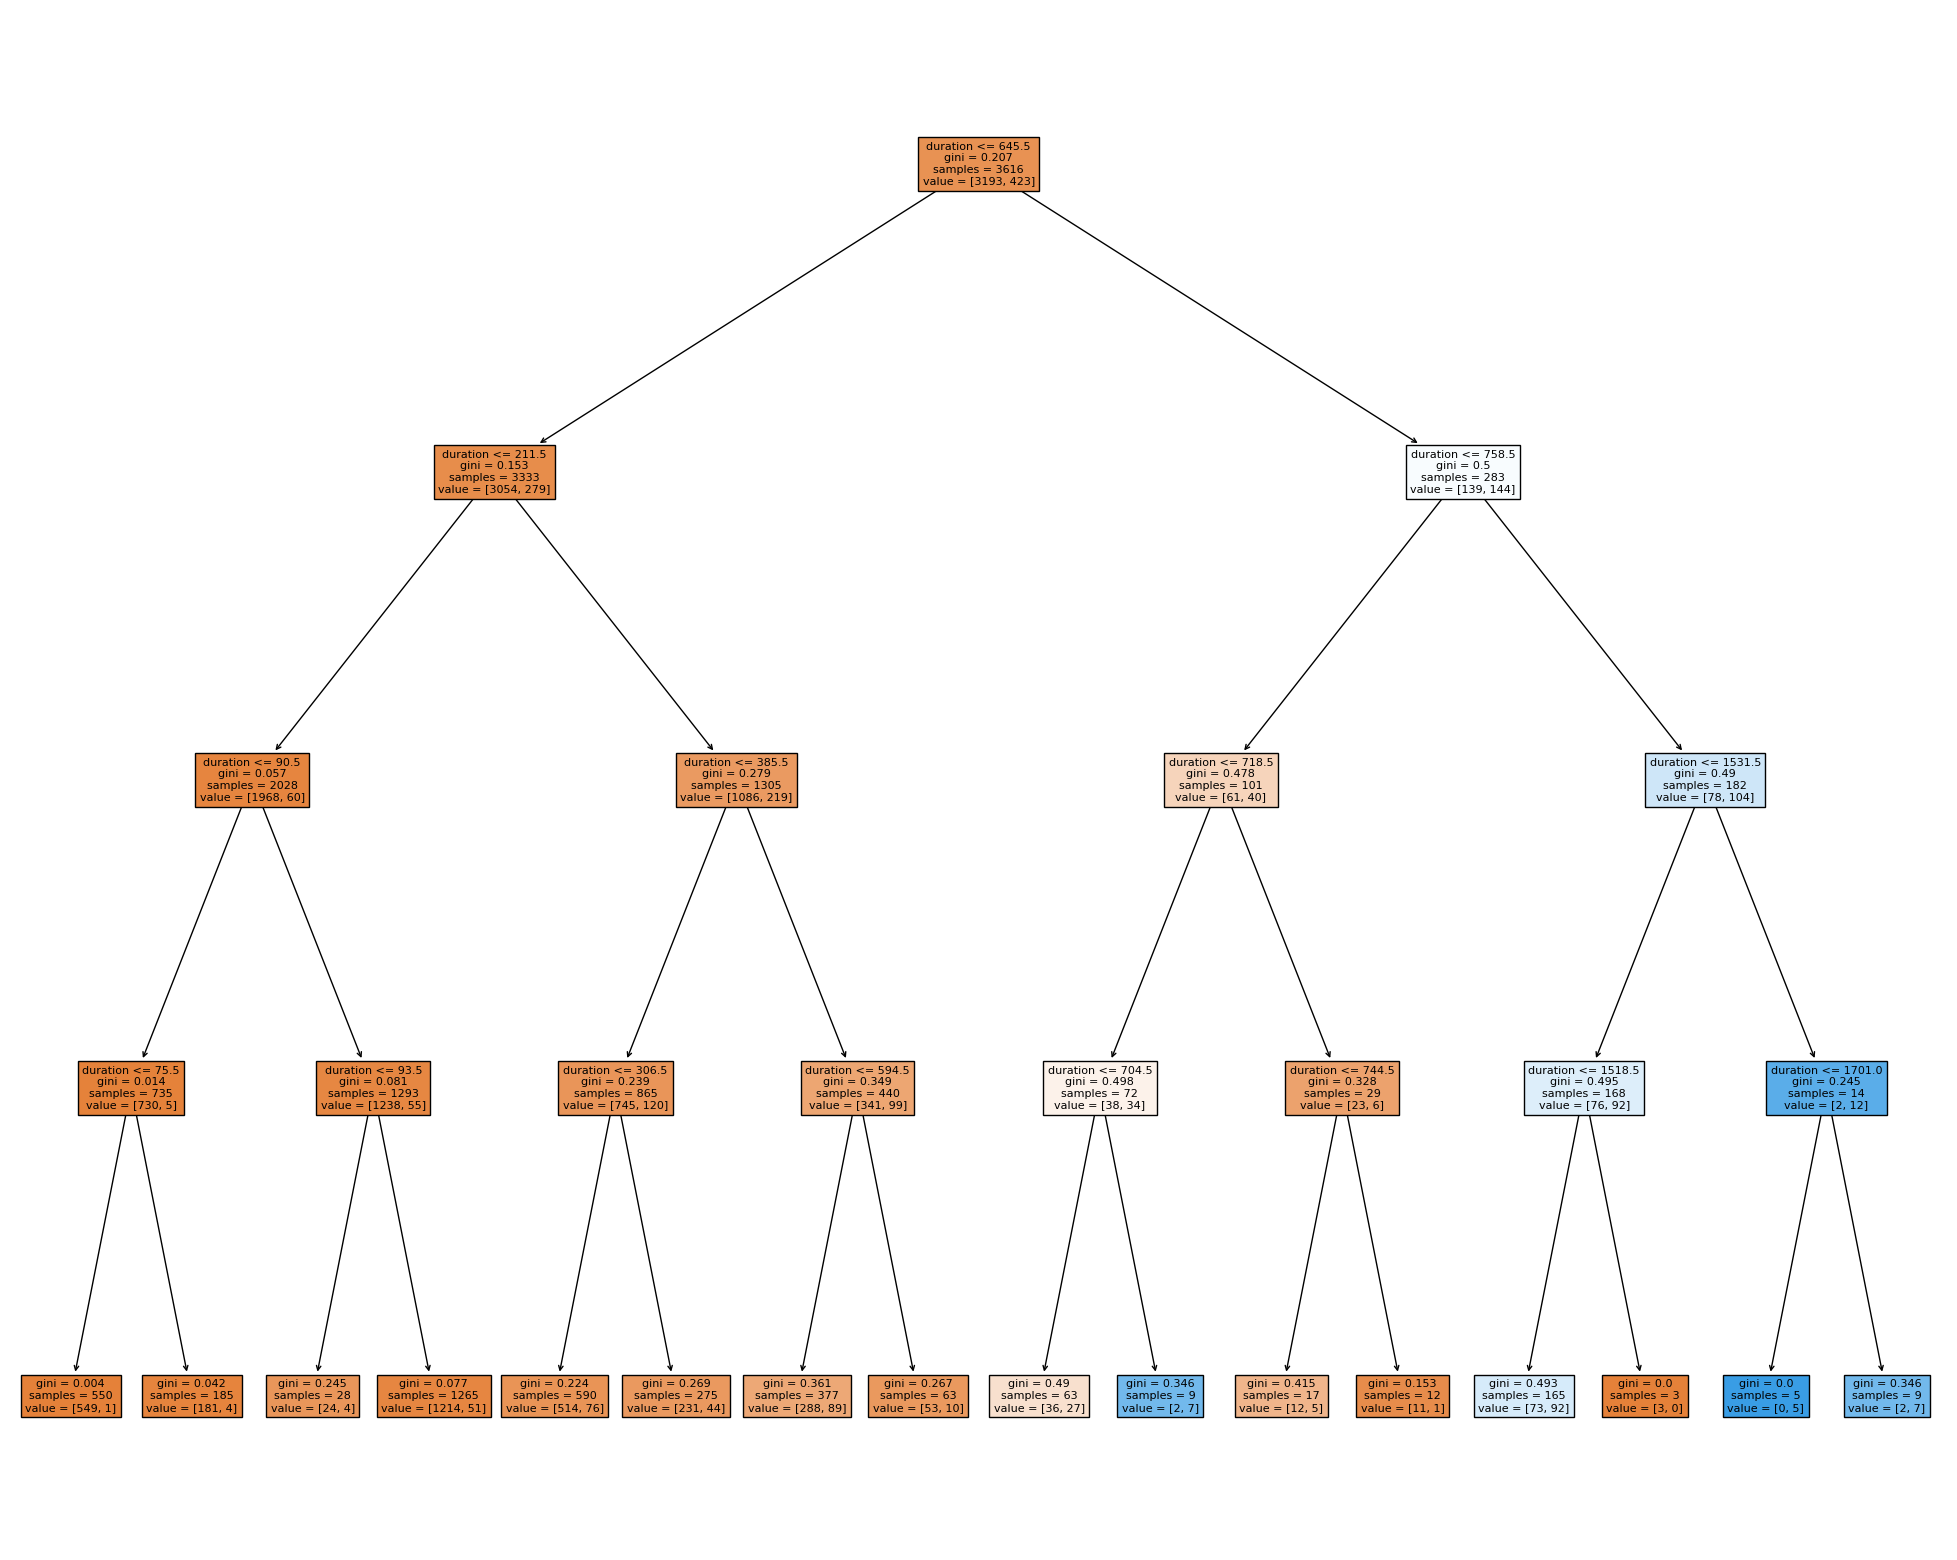

In [ ]:
#@title Visualize the tree using matplotlib (Method 2)
fig = plt.figure(figsize=(25,20))

x = tree.plot_tree(dt_classifier,
                   feature_names = X.columns,
                   filled=True)

#You can also save the tree as a PNG
fig.savefig("decistion_tree.png")

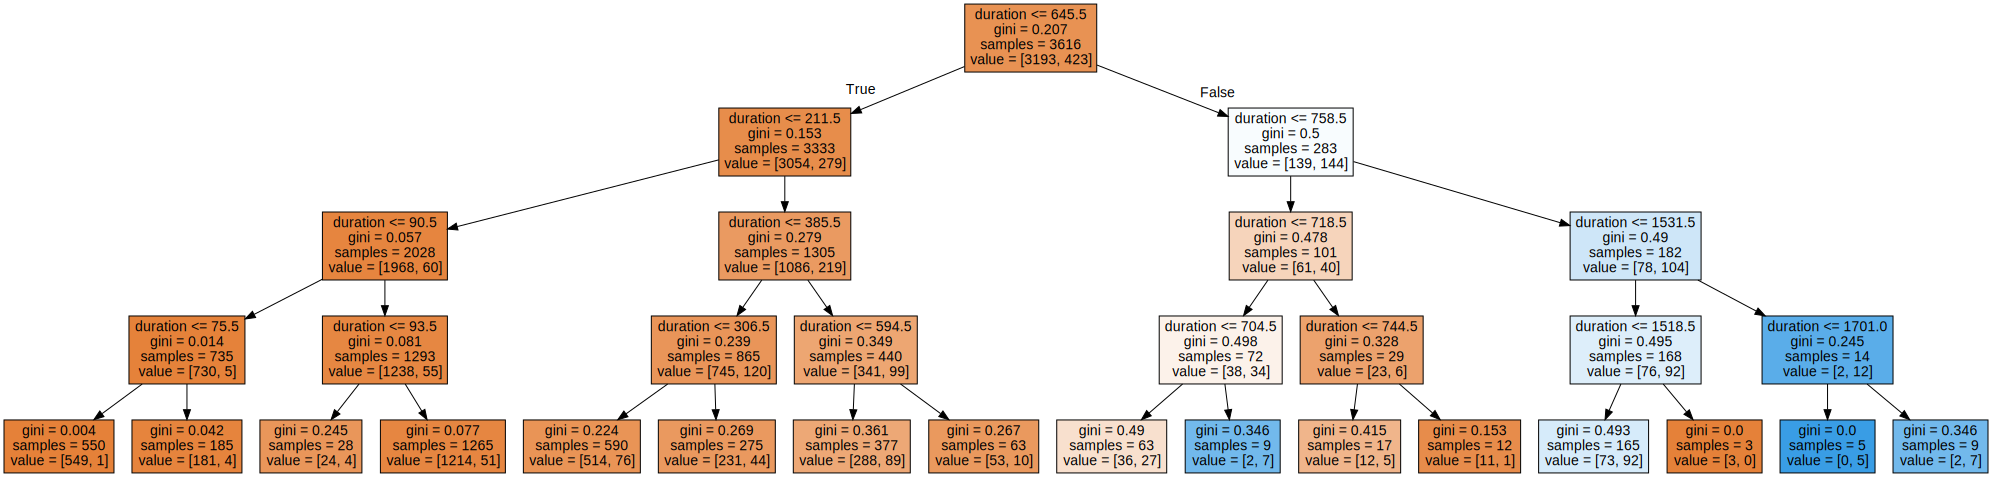

In [ ]:
#@title Visualize the decision tree Graphically (Method 3)
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from IPython.display import display
from graphviz import Source

# Display the Decision Tree
labels = df_new_data.columns

graph = tree.export_graphviz(dt_classifier)
graph = tree.export_graphviz(dt_classifier, feature_names = labels)
graph = tree.export_graphviz(dt_classifier, feature_names = labels, filled = True)
Source(graph)

#Interpretation of the Decision Node

For example, let us consider the node where
Duration <= 211.5: This is the splitting condition for this node. It means that for a given data point, if the duration feature (presumably the duration of some event or activity) is less than or equal to 211.5 units (minutes, seconds, etc.), the data point will follow the left branch of the decision tree. Otherwise, it will follow the right branch.

gini = 0.153: Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset. A Gini impurity of 0 indicates that the node is pure (all samples belong to the same class), while a Gini impurity of 1 indicates that the samples are uniformly distributed across all classes. In this case, a Gini impurity of 0.153 suggests that there is some impurity or mixing of classes within the node, but it is relatively low.

samples = 3333: This indicates the total number of samples or data points that reach this node in the decision tree.

value = [3054, 279]: This represents the distribution of the target variable (the dependent variable) among the samples that reach this node. In this case, there are 3054 samples belonging to one class (e.g., class 0) and 279 samples belonging to another class (e.g., class 1). We need to map the value to the actual values. For example, class 0 represents "did not buy" and class 1 represents "bought".

# Interpretation of Classification Report:

Accuracy: The accuracy of the decision tree model is 0.8917, which means that approximately 89.17% of the predictions made by the model are correct.

Precision: Precision measures the proportion of true positive predictions (correctly predicted positives) out of all positive predictions made by the model.

For class 0: Precision is 0.91, indicating that when the model predicts a sample as belonging to class 0, it is correct 91% of the time.

For class 1: Precision is 0.50, meaning that when the model predicts a sample as belonging to class 1, it is correct only 50% of the time.

Recall: Recall (also known as sensitivity) measures the proportion of true positive predictions out of all actual positive instances in the data.

For class 0: Recall is 0.97, indicating that the model correctly identifies 97% of all actual class 0 instances.

For class 1: Recall is 0.26, indicating that the model only identifies 26% of all actual class 1 instances.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

For class 0: F1-score is 0.94, indicating a good balance between precision and recall for class 0.

For class 1: F1-score is 0.34, suggesting that the model's performance for class 1 is relatively lower compared to class 0.
Support: The support represents the number of actual occurrences of each class in the data.

For class 0: The support is 807, indicating that there are 807 instances of class 0 in the dataset.

For class 1: The support is 98, indicating that there are 98 instances of class 1 in the dataset.

Macro Average: The macro average is the average of precision, recall, and F1-score across all classes, giving equal weight to each class.

Macro average precision, recall, and F1-score are 0.71, 0.61, and 0.64, respectively.

Weighted Average: The weighted average is the weighted average of precision, recall, and F1-score across all classes, weighted by the number of instances in each class.

Weighted average precision, recall, and F1-score are 0.87, 0.89, and 0.88, respectively.
In summary, while the model has high accuracy overall, its performance varies between the two classes. It performs well in predicting class 0 instances, but not as well for class 1 instances, as indicated by lower precision, recall, and F1-score for class 1.

# Conclusion

Correlation data derived from the given datadata (marketing_problem.xlsx) provided interesting insights. Many of the features except the call duration do not have much impact (all of these are less than 0.2) on the final outcome.

Hence, only the "call duration" is included in the model.

Note: If needed, the current threshold of 0.2 can be further reduced to include other features. However, such inclusion would not have much impact on the final outcome.

Having a call duration of more than > 90 seconds will have bigger impact.